In [1]:
import pandas as pd
import csv

df = pd.read_csv("Fake_Real_Data.csv",error_bad_lines=False, engine="python")
df.head()

C:\Users\Vinay Thakur\AppData\Local\Temp\ipykernel_7976\920367437.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("Fake_Real_Data.csv",error_bad_lines=False, engine="python")
Skipping line 5981: unexpected end of data


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df.shape

(5979, 2)

In [3]:
df.label.value_counts()

Fake    3048
Real    2931
Name: label, dtype: int64

In [4]:
df['label_num'] = df['label'].map({'Fake':0, 'Real':1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs ")
doc.vector.shape

(300,)

In [7]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [8]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [9]:
df.vector.values

array([array([-0.6759837 ,  1.4263071 , -2.318466  , -0.451093  ,  2.8199325 ,
               0.85161996,  0.01045941,  3.6876464 , -1.1069572 , -0.89137274,
               4.7383623 ,  0.93590134, -2.4224715 ,  0.1756112 ,  1.1680135 ,
               1.358259  ,  0.968191  , -1.223655  , -0.95027757, -0.3604985 ,
               0.54369414, -0.48284245, -0.42516926, -1.8079175 , -0.63552403,
              -1.7014275 , -1.5113001 , -0.5503619 , -0.78364307,  0.83594626,
               0.8964651 , -0.1389701 , -0.7893373 , -0.42614973, -2.1502306 ,
              -0.92926306, -0.8751075 ,  0.8984946 ,  1.1605583 ,  1.0838758 ,
              -0.04290289,  0.0810288 , -0.04022507,  0.16692582, -1.4921017 ,
               1.1105057 ,  0.07551349, -3.346768  , -1.3400731 ,  2.8042486 ,
              -1.1094471 ,  0.2824121 ,  0.8654462 , -3.8102863 , -0.59461933,
               0.0378601 ,  0.2941968 ,  1.0687567 ,  0.99998826,  0.66275495,
               1.6435239 , -0.40380004, -0.6515654 ,

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=42
)

In [11]:
X_train.shape

(4783,)

In [12]:

X_test.shape

(1196,)

In [13]:
import numpy as np

X_train_2d = np.stack(X_train)

X_test_2d = np.stack(X_test)


In [14]:
X_train_2d

array([[-1.2975544 ,  0.2954331 , -0.71771824, ..., -0.7441542 ,
        -0.35201892,  0.6095386 ],
       [-1.6493394 ,  0.29548872, -2.1760228 , ..., -1.0878922 ,
        -2.8138742 ,  1.0466051 ],
       [-1.3869236 ,  0.97706825, -1.7501727 , ..., -0.9739933 ,
        -1.7172672 ,  0.8820344 ],
       ...,
       [-2.3045952 ,  0.29060102, -1.654057  , ..., -1.8792329 ,
        -1.3021306 ,  0.48727357],
       [-2.7914732 ,  0.26514372, -1.7136743 , ..., -1.993619  ,
        -1.2461776 ,  0.9651071 ],
       [-1.061138  ,  0.81994104, -2.5229065 , ...,  0.57455444,
        -2.9443104 ,  1.168517  ]], dtype=float32)

In [17]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)



clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [18]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       613
           1       0.93      0.93      0.93       583

    accuracy                           0.93      1196
   macro avg       0.93      0.93      0.93      1196
weighted avg       0.93      0.93      0.93      1196



In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       613
           1       0.99      0.99      0.99       583

    accuracy                           0.99      1196
   macro avg       0.99      0.99      0.99      1196
weighted avg       0.99      0.99      0.99      1196



Text(95.72222222222221, 0.5, 'Truth')

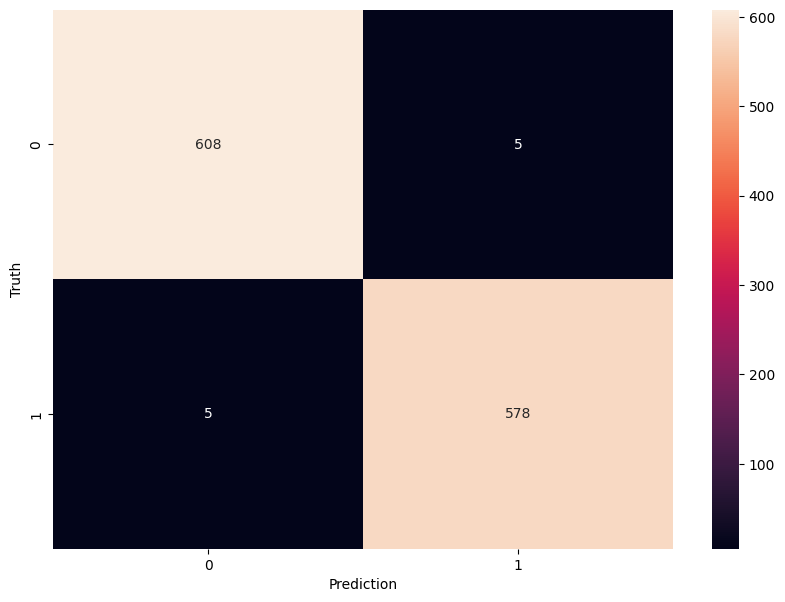

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')